In [6]:
import pandas as pd
import numpy as np


In [9]:
df = pd.read_csv('indian_food.csv')
df['total_time'] = df['prep_time']+df['cook_time']


Average mean time for cooking is : 65.63529411764706


In [33]:
pf = df.groupby('state')['total_time'].mean()
pf = pd.DataFrame(pf)
n_largest = pd.DataFrame(pf.nlargest(pf.shape[0], 'total_time'))
print(n_largest)

                 total_time
state                      
Manipur          141.500000
Karnataka        105.000000
Kerala           101.000000
Andhra Pradesh    98.500000
-1                98.125000
Bihar             88.333333
Punjab            86.093750
West Bengal       82.541667
Chhattisgarh      70.000000
Haryana           70.000000
Maharashtra       66.500000
Rajasthan         62.833333
Telangana         60.000000
Uttar Pradesh     59.444444
Madhya Pradesh    57.500000
Odisha            50.285714
NCT of Delhi      45.000000
Goa               42.666667
Gujarat           40.228571
Tamil Nadu        37.200000
Jammu & Kashmir   34.000000
Uttarakhand       30.000000
Assam             20.000000
Nagaland          20.000000
Tripura           -2.000000


([<matplotlib.patches.Wedge at 0x7f3712b631c0>,
 [Text(0.9349423346015626, 0.5795539931445387, 'Manipur'),
  Text(0.05410263718183958, 1.0986686964913355, 'Karnataka'),
  Text(-0.7567378414855591, 0.7983406786978708, 'Kerala'),
  Text(-1.0995122830127737, 0.032752702240247615, 'Andhra Pradesh'),
  Text(-0.8113427381060836, -0.7427805606789418, '-1'),
  Text(-0.10791780272261225, -1.0946934492612639, 'Bihar'),
  Text(0.6081284843256207, -0.9166131935292136, 'Punjab'),
  Text(1.0428724420955864, -0.34988150782456046, 'West Bengal')],
 [Text(0.5099685461463068, 0.3161203598970211, '17.7%'),
  Text(0.029510529371912494, 0.5992738344498193, '13.1%'),
  Text(-0.4127660953557595, 0.4354585520170204, '12.6%'),
  Text(-0.599733972552422, 0.017865110312862333, '12.3%'),
  Text(-0.4425505844215001, -0.4051530330976046, '12.2%'),
  Text(-0.05886425603051577, -0.5971055177788712, '11.0%'),
  Text(0.3317064459957931, -0.4999708328341164, '10.7%'),
  Text(0.5688395138703197, -0.1908444588133966, '10.

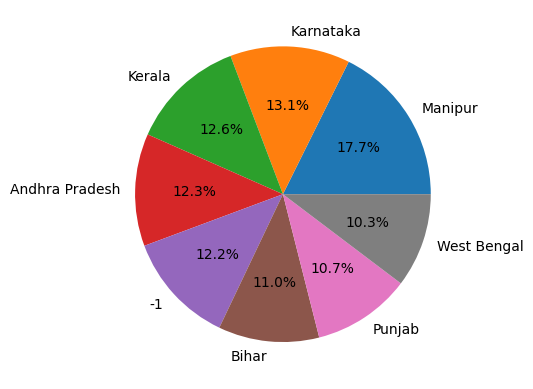

In [41]:
from matplotlib import pyplot as plt
import numpy as np

top_8 = n_largest.head(8)

plt.pie(top_8['total_time'] , autopct = '%1.1f%%',labels=top_8['total_time'].index)



Calculate z-scores for Fixed Capital across all states. Identify states with z-scores ≥ ±2.5 (outliers).
Which states have exceptionally high or low industrial fixed capital?

In [43]:
# Q1
from scipy import stats

icd = pd.read_csv('q1.csv')
icd['z_score'] = stats.zscore(icd['Fixed Capital'])
icd[['State','z_score']]

    Unnamed: 0                           State  Number Of Factories  \
0            0             Andaman & N. Island                   14   
1            1                  Andhra Pradesh                16483   
2            2               Arunachal Pradesh                  198   
3            3                           Assam                 5712   
4            4                           Bihar                 3307   
5            5                      Chandigarh                  229   
6            6                     Chattisgarh                 4717   
7            7  Dadra & N Haveli & Daman & Diu                 2783   
8            8                           Delhi                 3063   
9            9                             Goa                  694   
10          10                         Gujarat                31031   
11          11                         Haryana                10603   
12          12                Himachal Pradesh                 2632   
13    

In [89]:
outliers = icd[icd['z_score'].abs() >= 2.5]
print(outliers[['State' , 'z_score']])



      State   z_score
10  Gujarat  4.144812


Q2
Apply 3-point moving average to smooth wage related data that is Wages to Workers, Total
Emoluments, and Net Income across states.

In [86]:
col = ['Wages to Workers' , 'Total Emolumnets' , 'Net Income']

for c in col :
    icd[f'{c}'] = icd[c].rolling(window=3 , center = True).mean()

print(icd)

    Unnamed: 0                           State  Number Of Factories  \
0            0             Andaman & N. Island                   14   
1            1                  Andhra Pradesh                16483   
2            2               Arunachal Pradesh                  198   
3            3                           Assam                 5712   
4            4                           Bihar                 3307   
5            5                      Chandigarh                  229   
6            6                     Chattisgarh                 4717   
7            7  Dadra & N Haveli & Daman & Diu                 2783   
8            8                           Delhi                 3063   
9            9                             Goa                  694   
10          10                         Gujarat                31031   
11          11                         Haryana                10603   
12          12                Himachal Pradesh                 2632   
13    

# Q3
Load the dataset IHHL.csv and compute the total achieved IHHL (column “IHHLTotalAch”) of all the
districts in each state. Print the results and verify.

In [61]:
ihhl = pd.read_csv('IHHL.csv')
print(ihhl)

     StateID       StateName  DistrictID  DistrictCensusCode2011  \
0         26   A & N Islands         578                     639   
1         26   A & N Islands         576                     640   
2          1  Andhra Pradesh        1368                     813   
3          1  Andhra Pradesh           8                     550   
4          1  Andhra Pradesh        1375                     811   
..       ...             ...         ...                     ...   
740       33     Uttarakhand         603                      66   
741       33     Uttarakhand         604                      61   
742       33     Uttarakhand         608                      67   
743       25     West Bengal         556                     334   
744       25     West Bengal         561                     338   

                 DistrictName  IHHLTotalAsPerDetails  IHHLTotalAch  \
0    NORTH AND MIDDLE ANDAMAN                  18187         18187   
1              SOUTH ANDAMANS              

In [80]:
af = ihhl.groupby('StateName')['IHHLTotalAch'].sum()
# af = pd.DataFrame(af)
zsc = stats.zscore( af)

ihhl_outlier = zsc[zsc.abs() >= 3]
ihhl_inlier = zsc[zsc.abs() < 3]
# print(ihhl_outlier)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33],
 [Text(0, 0, 'A & N Islands'),
  Text(1, 0, 'Andhra Pradesh'),
  Text(2, 0, 'Arunachal Pradesh'),
  Text(3, 0, 'Assam'),
  Text(4, 0, 'Bihar'),
  Text(5, 0, 'Chhattisgarh'),
  Text(6, 0, 'D & N Haveli and Daman & Diu'),
  Text(7, 0, 'Goa'),
  Text(8, 0, 'Gujarat'),
  Text(9, 0, 'Haryana'),
  Text(10, 0, 'Himachal Pradesh'),
  Text(11, 0, 'Jammu & Kashmir'),
  Text(12, 0, 'Jharkhand'),
  Text(13, 0, 'Karnataka'),
  Text(14, 0, 'Kerala'),
  Text(15, 0, 'Ladakh'),
  Text(16, 0, 'Lakshadweep'),
  Text(17, 0, 'Madhya Pradesh'),
  Text(18, 0, 'Maharashtra'),
  Text(19, 0, 'Manipur'),
  Text(20, 0, 'Meghalaya'),
  Text(21, 0, 'Mizoram'),
  Text(22, 0, 'Nagaland'),
  Text(23, 0, 'Odisha'),
  Text(24, 0, 'Puducherry'),
  Text(25, 0, 'Punjab'),
  Text(26, 0, 'Rajasthan'),
  Text(27, 0, 'Sikkim'),
  Text(

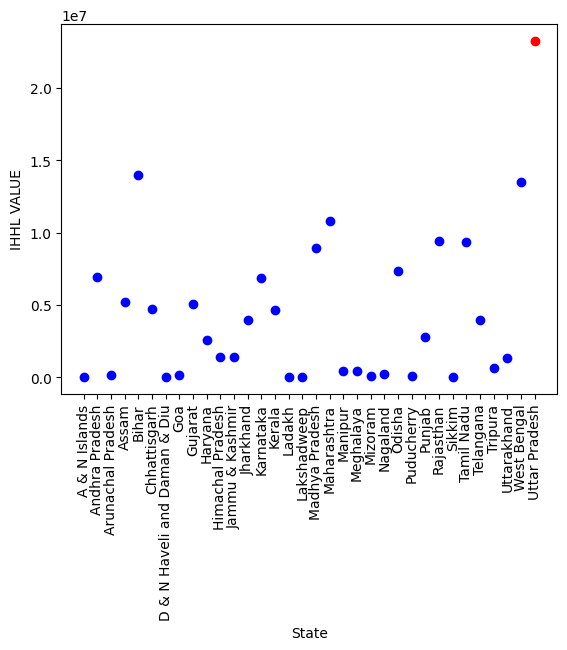

In [84]:
plt.scatter(ihhl_inlier.index , af[ihhl_inlier.index] , color = 'blue')
plt.scatter(ihhl_outlier.index , af[ihhl_outlier.index] , color = 'red')
plt.xlabel("State")
plt.ylabel("IHHL VALUE")
plt.xticks(rotation=90)